### Construção de dashboards utilizando _Streamlit_

Hoje veremos um pouco de uma ferramenta muito útil e fácil de usar: o Streamlit. Este pacote python permite a criação de páginas web dinâmicas e adaptáveis com poucas linhas de código python, sendo perfeita para o desenvolvimento rápido de dashboards, painéis de acompanhamento e gráficos interativos. 

É possível coletar inputs dos usuários através de elementos padrão de formulários (selectbox, campo de texto, checkbox e etc), além de plottar gráficos interativos.

**Não conseguiremos utilizar a biblioteca pelo Jupyter Notebook** - precisamos instalar o pacote, criar um arquivo .py e executá-lo com o comando `streamlit run arquivo.py` no terminal. Alguns códigos estão neste notebook para conveniência.

A documentação da ferramenta é extremamente rica e possui exemplos de aplicação: https://docs.streamlit.io/develop/api-reference

In [48]:
# Instalando pacotes
!pip install streamlit plotly


[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Crie um arquivo `streamlit_dash.py` (ou qualquer outro nome) e insira as seguintes linhas:

```
import streamlit as st
st.write('Olá, mundo!')
```

Executando a célula abaixo, uma nova guia será aberta com nossa página web:

In [53]:
!streamlit run streamlit_dash.py

^C


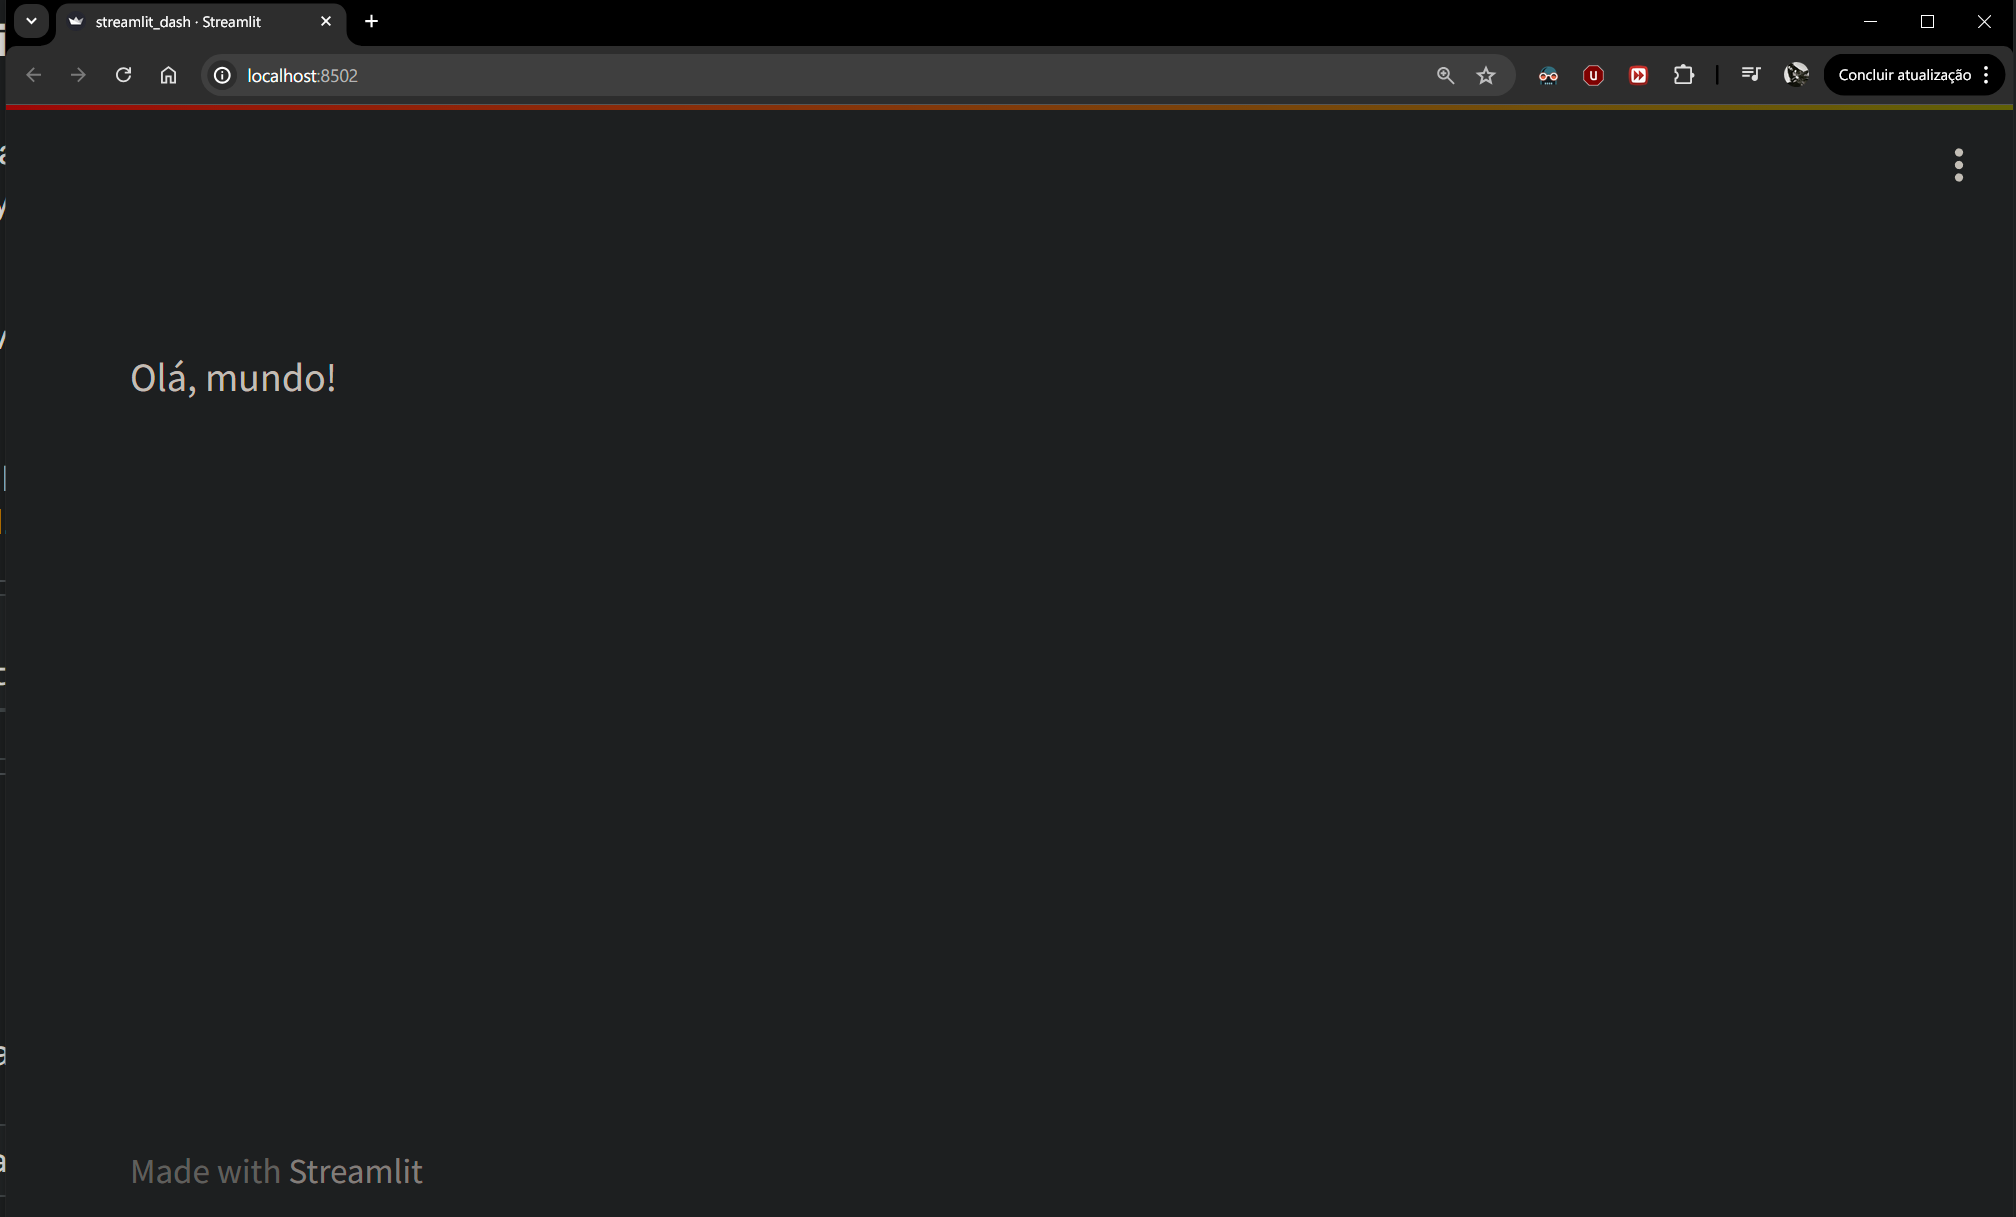

Também podemos utilizar funções como `st.header()` ou `st.title()`. Uma outra funcionalidade interessante é a _sidebar_. Vamos ativá-la adicionando as seguintes linhas:

```
st.sidebar.title('Olá título da sidebar!')
st.sidebar.write('Olá sidebar!')
```



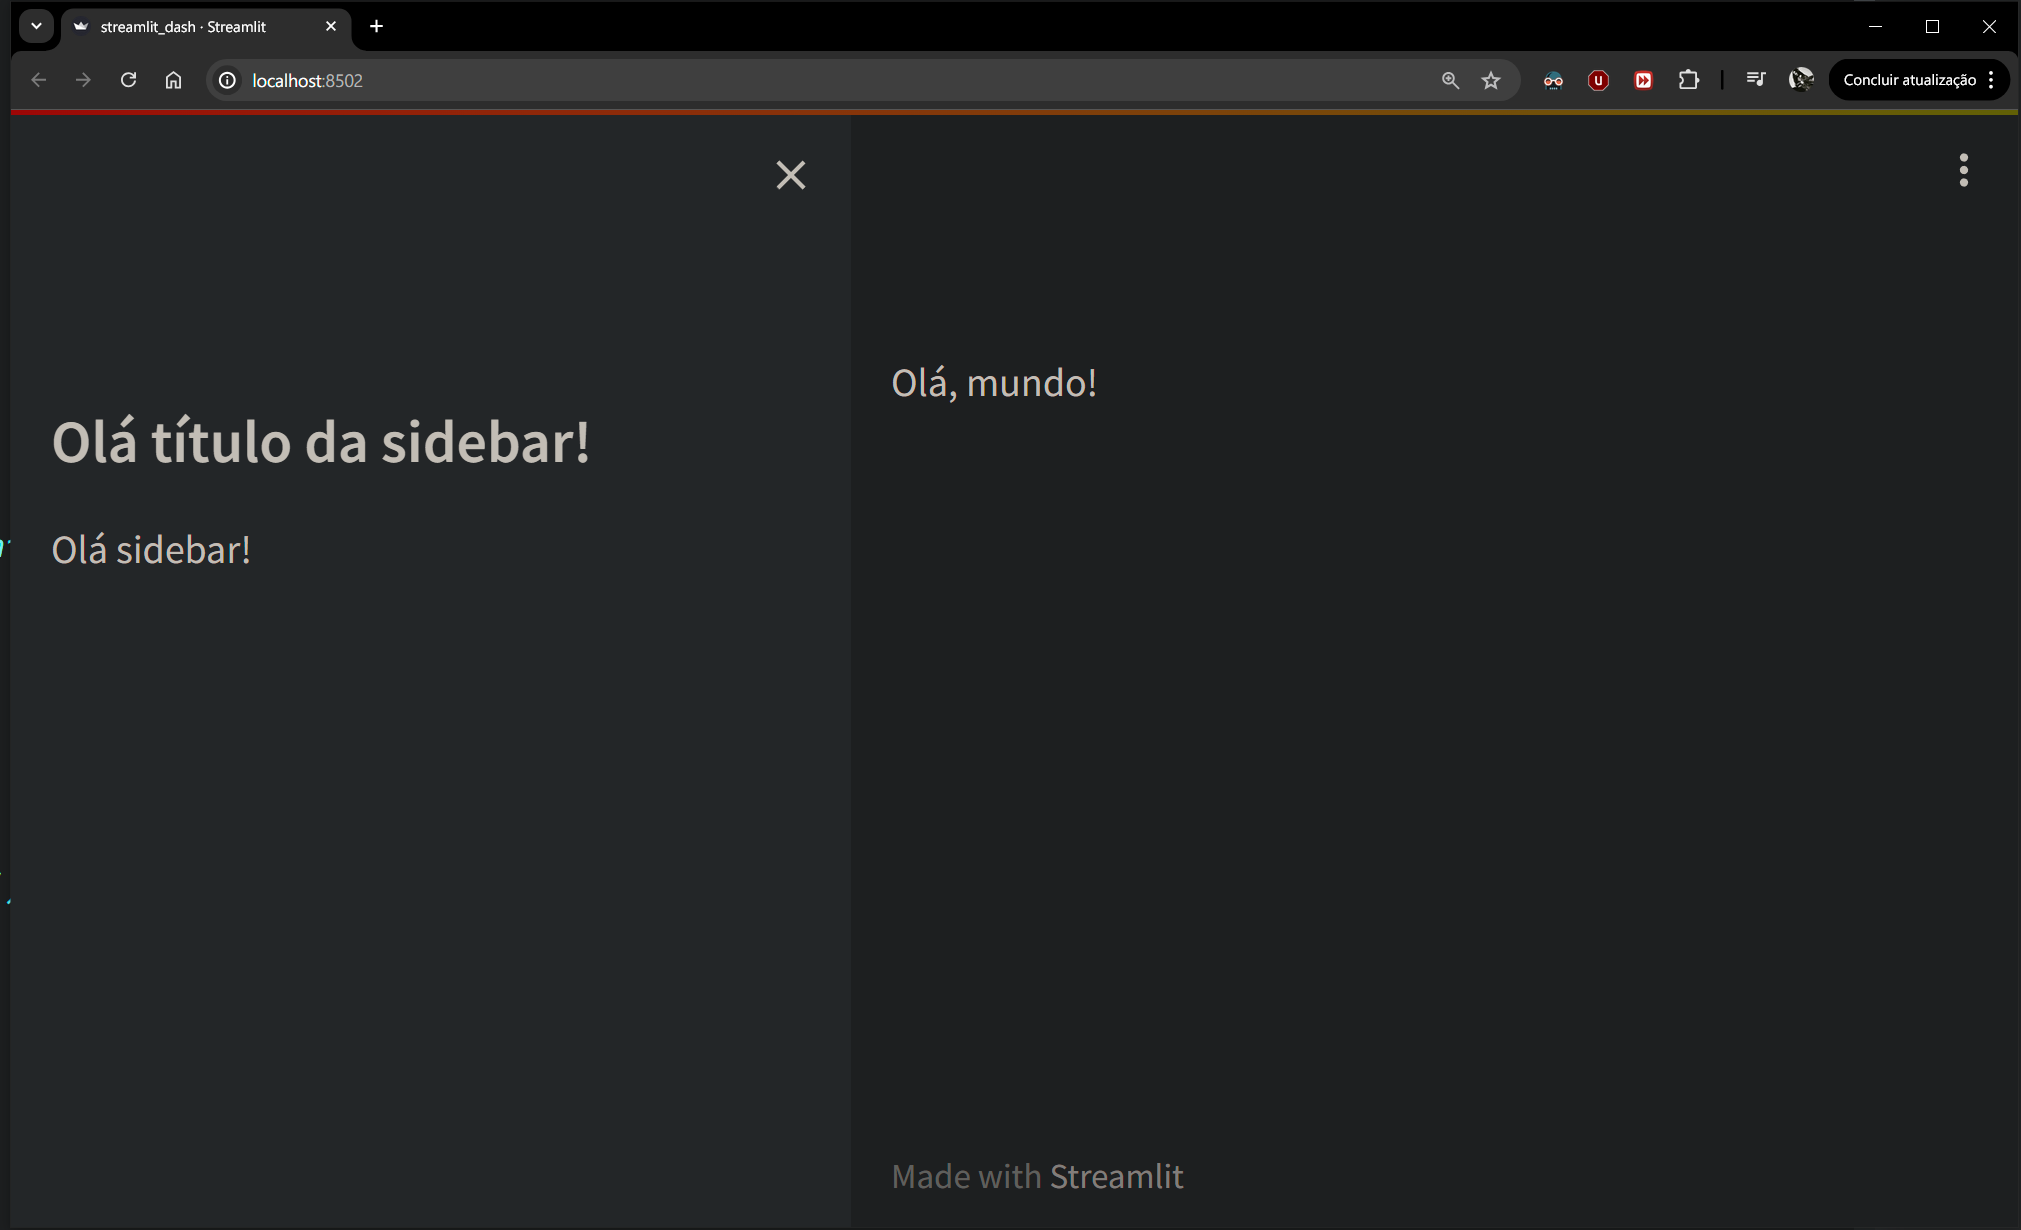

Fazendo mais algumas configurações:

```
st.set_page_config(
   page_title='Dashboard',
   page_icon='🧮',
   layout='wide',
   initial_sidebar_state='expanded',
)

```

Note que esta configuração precisa ser chamada antes de qualquer escrita.

Para recuperar o valor de um campo, basta atribuí-lo a uma variável:

```
col_x = st.selectbox(label='Eixo x', options=df.columns)
col_y = st.selectbox(label='Eixo y', options=df.columns)
```

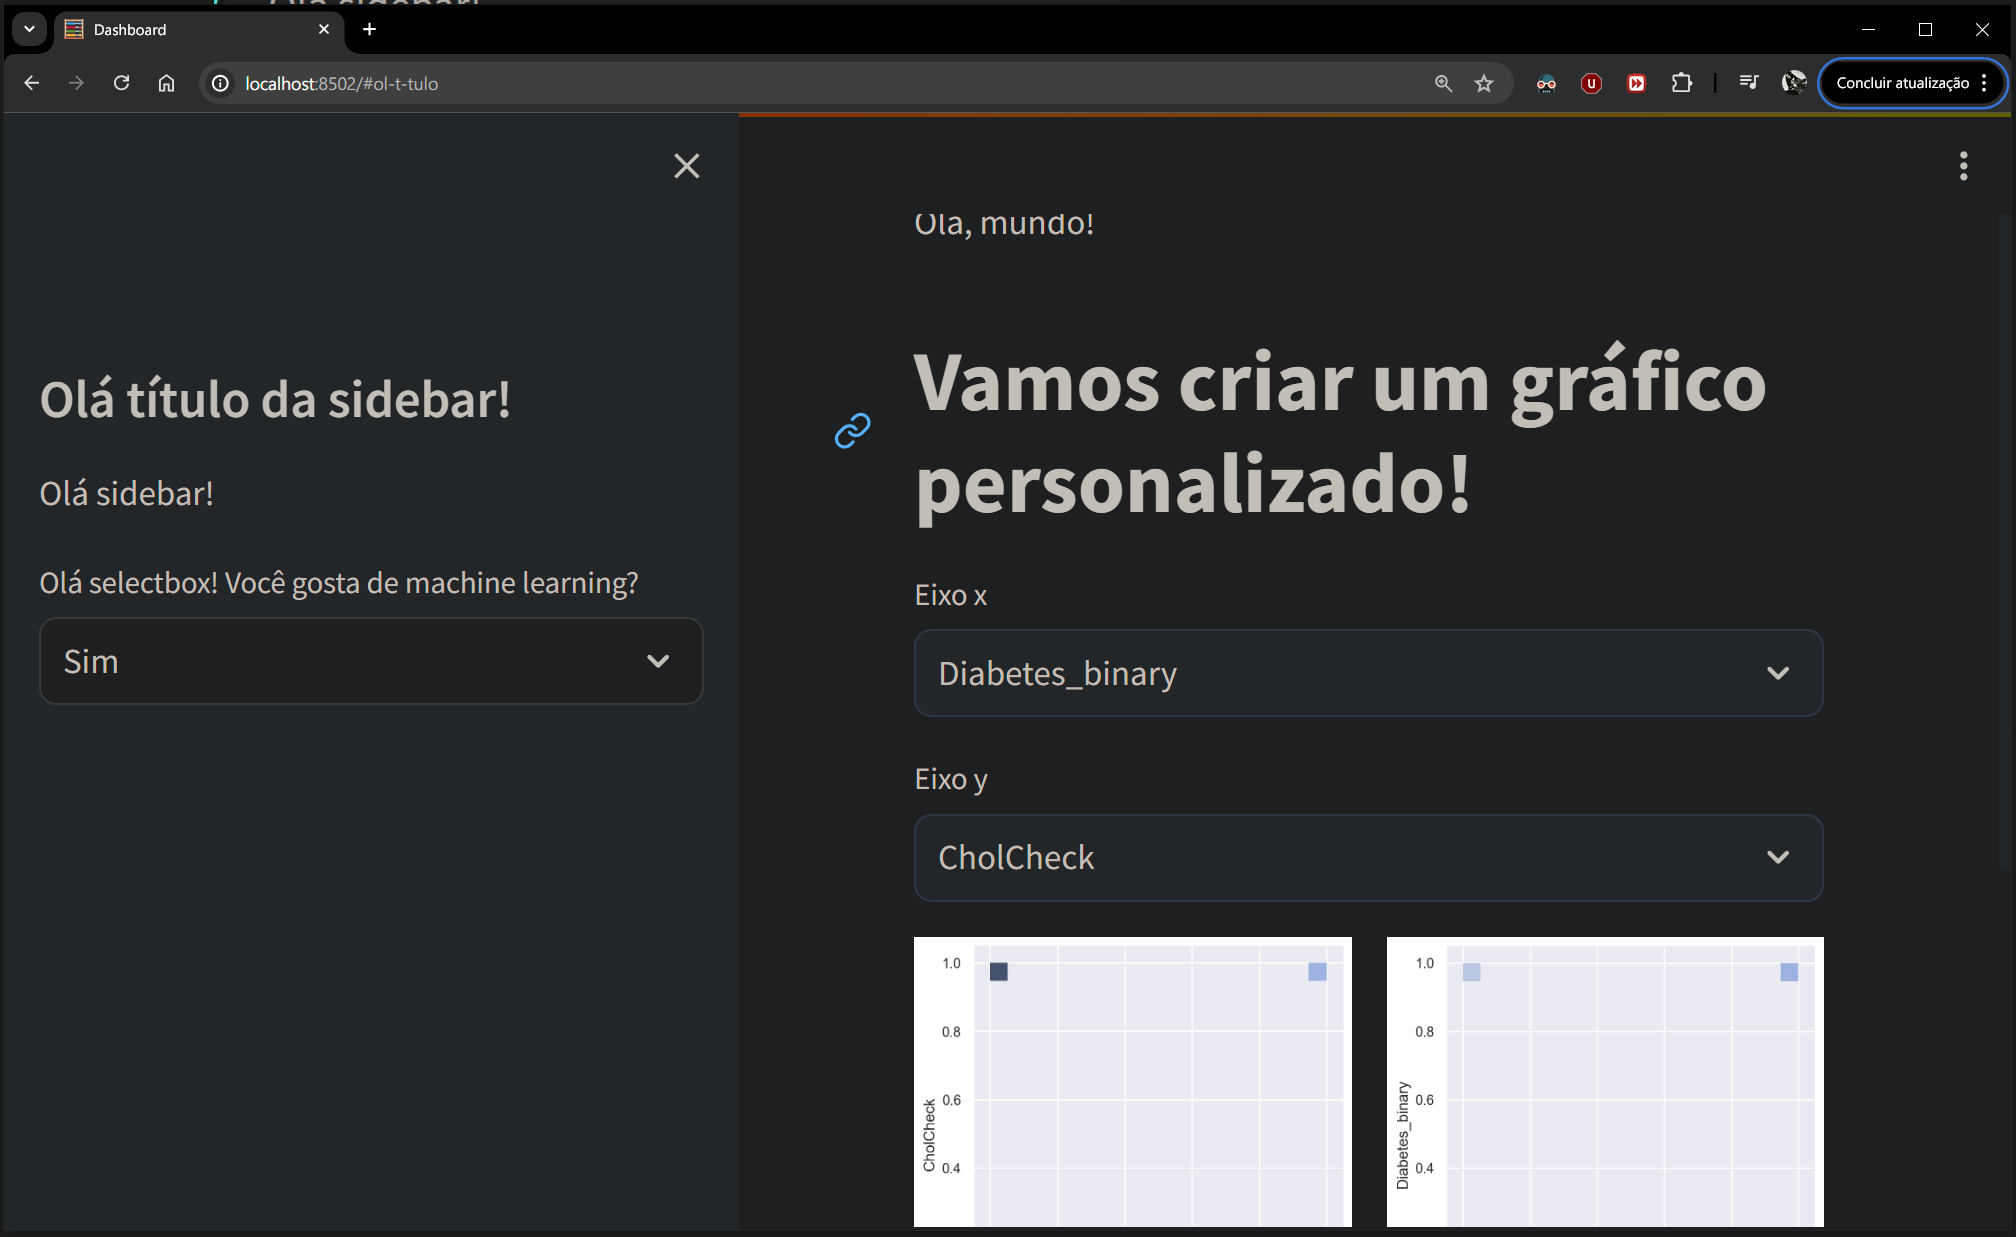

A biblioteca pode ser manipulada em nível mais baixo, e suporta várias formas de otimização como caches e atualização parcial.

In [55]:
df = pd.read_csv('microdados_enem_2018.csv', sep=';', encoding='latin')

In [84]:
df_sampled = df.query('NU_NOTA_MT > 0 and NU_NOTA_CN > 0 and NU_NOTA_REDACAO > 0').sample(frac=0.01)

<Axes: xlabel='NU_NOTA_MT', ylabel='NU_NOTA_CN'>

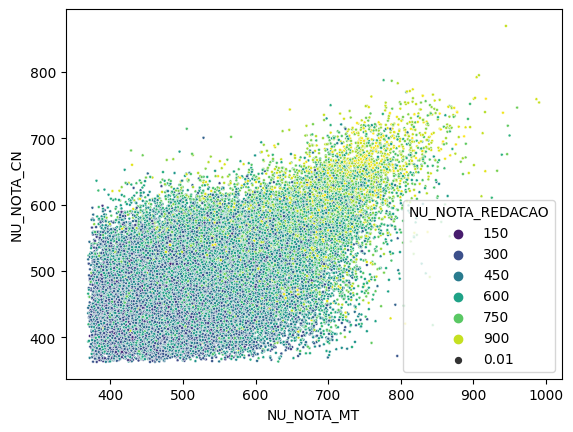

In [87]:
sns.scatterplot(x=df_sampled['NU_NOTA_MT'], y=df_sampled['NU_NOTA_CN'], size=0.01, marker='.',
               hue=df_sampled['NU_NOTA_REDACAO'], palette='viridis')

<Axes: >

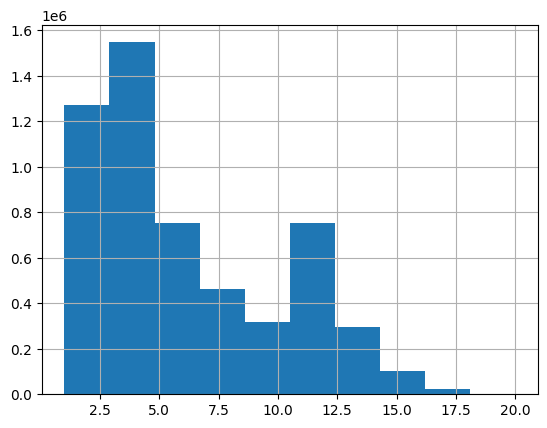

In [79]:
df['TP_FAIXA_ETARIA'].hist()

<Axes: xlabel='TP_FAIXA_ETARIA', ylabel='NU_NOTA_REDACAO'>

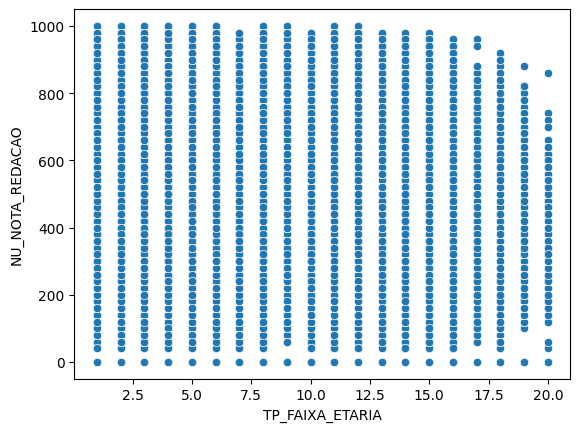

In [71]:
sns.scatterplot(x=df_sampled['TP_FAIXA_ETARIA'], y=df_sampled['NU_NOTA_REDACAO'])